# FT Optimize : Data Analysis

## Summary: 

This notebook shows the sample dataset analysis for a large eCommerce client with performance data running in 2019 and 2020. This notebook contains the numbers and visualizations that support my conclusions.


## Findings:

**What insights can you draw from this sample dataset?**
- In terms of roas, comparing the same months for 2019 and 2020, until now, 2020 presents better results than 2019, even when 2019 presents a higher average of clicks and income

- The average number of clicks in 2019 is greater than the average number of clicks in 2020

- Neither pattern nor seasonality was detected in this dataset

- Monday in 2019 and 2020 is the weekday with the lowest roas
- Q1 2020 has the highest average number of roas
- Q3 2019 has the lowest average number of roas

- 58% of campaigns are below of the target roas (1.5)  and, 42% of the campaigns have a metric roas equal to or greater than 1.5

- There are 81 of 140 campaigns, which are below the target roas, and 59 campaigns with roas are equal or greater than the target roas.

- High-performance campaigns (HPC) last at least 7 days, while low-performance campaigns (LPC) last minimum two days

- Cost, revenue, and cpc LPC features are higher than HPC features

- Cost, revenue, and clicks features are the variables with a stronger relationship among them.  It means more clicks, more cost, more revenue but it does not increase directly the roas variable.

- I found outliers on roas, index, cost, and clicks features. Those features should not be discarded or transform without close consideration of what is causing them. 


**Are there instances where we are making (repeated) costly mistakes?**

*I found campaigns with 50 or more consecutive days with 0 revenue. I consider those campaigns should be stopped, they are no working and a strategy change is required.*


**Based on this limited data, what approaches can we take to increase revenue without sacrificing efficiency?**

1. *The HPC cpc is Iess than LPC cpc so I suggest to find a way to decrease the cost per click*
2. *Include some alerts to monitor those campaigns with more than 30 consecutives days with no revenue*



---------------------------------------------------


# ANALYSIS DETAILS

### Importing Libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

### Loading Data

In [2]:
data = pd.read_csv('fto_data_puzzle.csv')

### Exploring Data

In [3]:
data.head()

,date,campaign_id,cost,clicks,revenue,cpc,roas
0,1/1/19,763598107,132.50,1269,1.66,0.10,0.01
1,1/2/19,763598107,141.02,1329,108.65,0.11,0.77
2,1/3/19,763598107,118.16,1161,149.50,0.10,1.27
3,1/4/19,763598107,105.76,1053,47.42,0.10,0.45
4,1/5/19,763598107,124.56,1228,188.71,0.10,1.52


In [4]:
data.tail()

,date,campaign_id,cost,clicks,revenue,cpc,roas
23622,7/2/20,5153691703,31.91,945,153.10,0.03,4.80
23623,7/3/20,5153691703,19.43,642,93.86,0.03,4.83
23624,7/4/20,5153691703,19.41,652,33.01,0.03,1.70
23625,7/5/20,5153691703,21.09,692,56.13,0.03,2.66
23626,7/6/20,5153691703,23.30,802,81.10,0.03,3.48


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23627 entries, 0 to 23626
Data columns (total 7 columns):
date           23627 non-null object
campaign_id    23627 non-null int64
cost           23627 non-null float64
clicks         23627 non-null int64
revenue        23627 non-null float64
cpc            23627 non-null float64
roas           23627 non-null float64
dtypes: float64(4), int64(2), object(1)
memory usage: 1.3+ MB


### Dataset Info

- Date :  Date
- Campaign_id : Campaign identificator
- Cost: Campaign Cost
- Clicks: Number of clicks at specific date
- Revenue: Income
- CPC (Cost per click): It measures of how much each ad campaign is paying per click
- Roas (Return on ad spend): It measures how efficient the campaign is performing and the target ROAS for this client is 1.50. It is calculated dividing Revenue/Cost      


|           DATA             |               |
|----------------------------|---------------|
| Number of Instances        | 23627         |
| Number of Attributes:      | 7             |
| Attribute Characteristics: | Object, integer and float|



### Is data complete and clean?

All null values must be in yellow


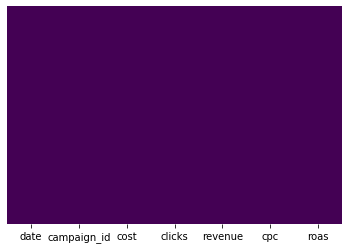

In [6]:
# Looking for null values

print('All null values must be in yellow')
sns.heatmap(data.isnull(),yticklabels=False,cbar=False,cmap='viridis')

**NOTE: Visualization above shows no null values, those ones should appear in yellow and it is not the case**

### Exploring numerical variables

In [7]:
def highlight_outlier(s):
    '''
    highlight outliers
    '''
    is_max = s >= 1 
    return ['background-color: yellow' if v else '' for v in is_max]


x=data[['cost','clicks','revenue','cpc','roas']].describe()
x=x.reset_index()
x.set_index([pd.Index([0,1,2,3,4,5,6,7])])

x.style.apply(highlight_outlier, subset = pd.IndexSlice[6:7, ['roas', 'cost','clicks','revenue']])

,index,cost,clicks,revenue,cpc,roas
0,count,23627,23627,23627,23627,23627
1,mean,29.2579,294.042,40.7704,0.0864998,5.59322
2,std,97.0618,916.5,123.139,0.074952,77.2194
3,min,0.01,1,0,0.01,0
4,25%,0.38,7,0,0.03,0
5,50%,2.19,36,0.9,0.07,0.2
6,75%,14.825,184.5,28,0.11,2.16
7,max,2053.87,20557,2501.67,1.59,6688


**NOTE: Highlighted in yellow are the huge difference between the 3rd quantile number and the max number on roas, index, cost, clicks variables. These outliers should not be discarded without close consideration of what is causing them**

### Looking for relationships among variables

Relationships Among Variables


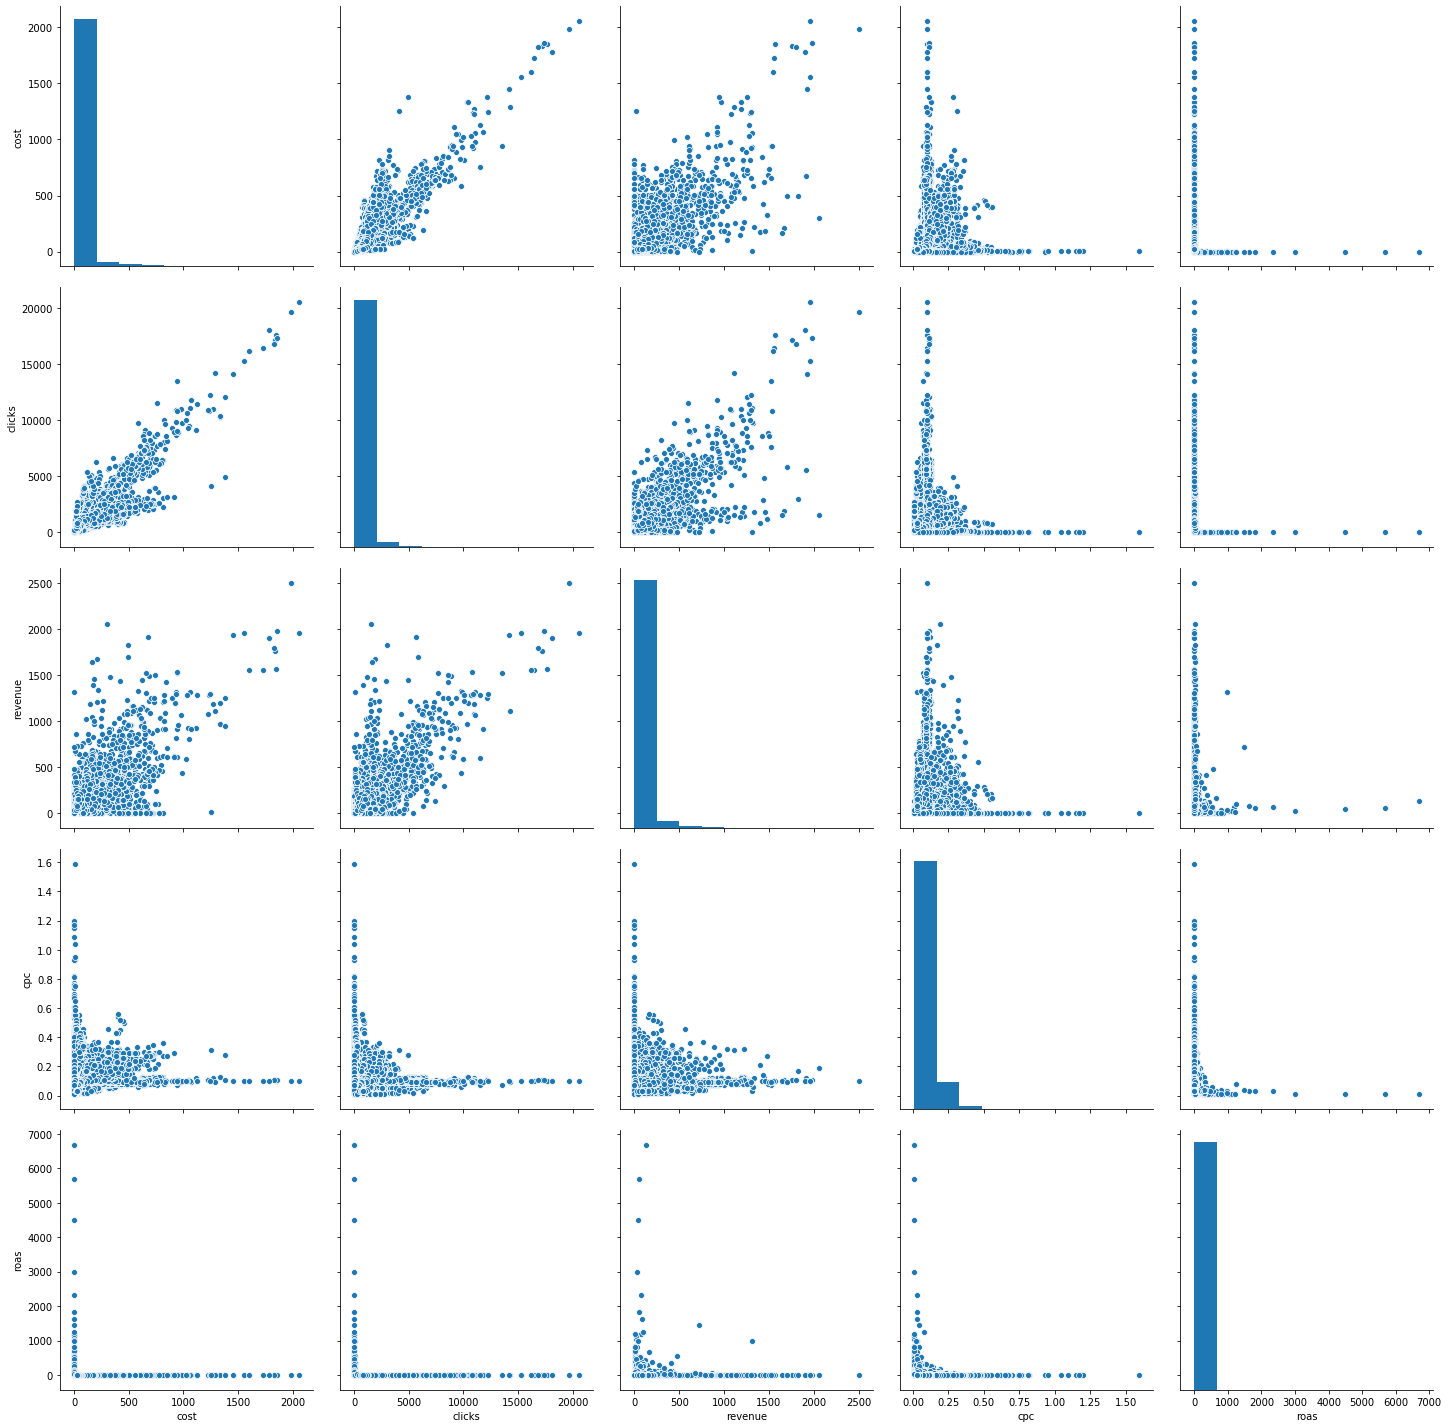

In [9]:
print('Relationships Among Variables') 
g = sns.pairplot(data, 
                  x_vars=['cost','clicks','revenue','cpc','roas'],
                  y_vars=['cost','clicks','revenue','cpc','roas'],
                  height=4, palette='Accent')

**NOTE: Based on visualization above I can say that cost, revenue, and clicks are the variables with a stronger relationship between them. Based on the Correlation Matrix below, I confirm the relation between those variables. More clicks, more cost, more revenue but it does not mean an increase on roas variable.**

             cost    clicks   revenue       cpc      roas
cost     1.000000  0.916303  0.772498  0.193165 -0.016395
clicks   0.916303  1.000000  0.808337  0.056293 -0.015672
revenue  0.772498  0.808337  1.000000  0.105548  0.024252
cpc      0.193165  0.056293  0.105548  1.000000 -0.040087
roas    -0.016395 -0.015672  0.024252 -0.040087  1.000000


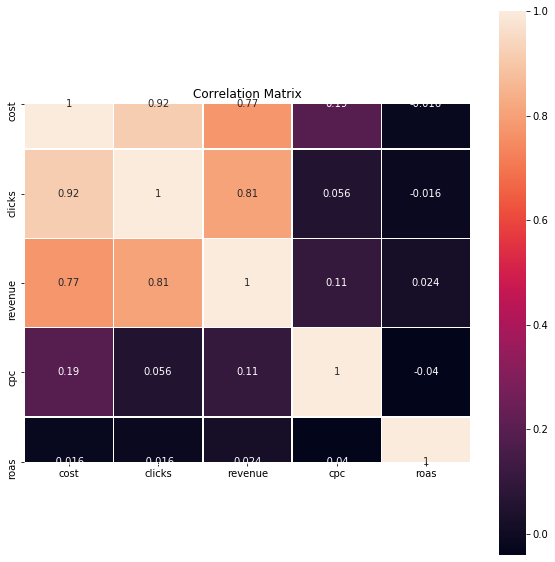

In [10]:
correlation = data[['cost','clicks','revenue','cpc','roas']].corr()
print(correlation)
plt.figure(figsize=(10,10))
sns.heatmap(correlation, square=True, annot=True, linewidths=.5)
plt.title("Correlation Matrix")

plt.show()

### Time Analysis

In [11]:
# Converting date variable to date type adn creating new variables for time analysis purpose

data['new_date']=data['date'].apply(lambda x: pd.to_datetime(x))
data['date_year']=data['new_date'].apply(lambda x: x.year)
data['date_month']=data['new_date'].apply(lambda x: x.month)
data['date_dayofweek']=data['new_date'].apply(lambda x: x.dayofweek)  #Monday=0, Sunday=6
data['date_quarter']=data['new_date'].apply(lambda x: x.quarter)  

In [12]:
data.head()

,date,campaign_id,cost,clicks,revenue,cpc,roas,new_date,date_year,date_month,date_dayofweek,date_quarter
0,1/1/19,763598107,132.50,1269,1.66,0.10,0.01,2019-01-01,2019,1,1,1
1,1/2/19,763598107,141.02,1329,108.65,0.11,0.77,2019-01-02,2019,1,2,1
2,1/3/19,763598107,118.16,1161,149.50,0.10,1.27,2019-01-03,2019,1,3,1
3,1/4/19,763598107,105.76,1053,47.42,0.10,0.45,2019-01-04,2019,1,4,1
4,1/5/19,763598107,124.56,1228,188.71,0.10,1.52,2019-01-05,2019,1,5,1


### Analysis of Roas, Revenue and Clicks per Year and Months

Average Roas per Month (2019 and 2020)


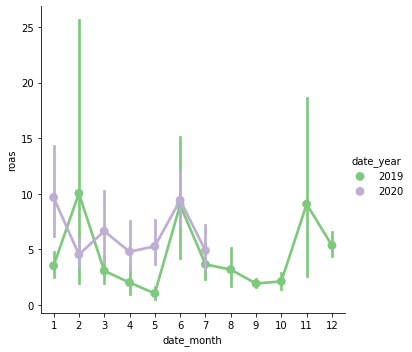

In [13]:
print('Average Roas per Month (2019 and 2020)')
ax = sns.catplot(x="date_month", y="roas", hue='date_year', data=data, kind="point", palette='Accent')

Average Revenue per Month (2019 and 2020)


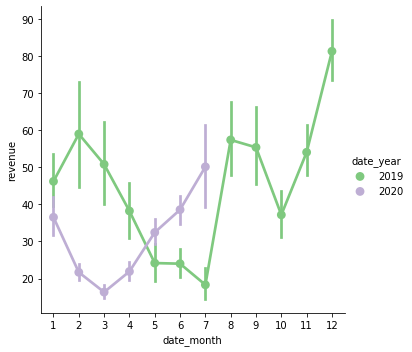

In [15]:
print('Average Revenue per Month (2019 and 2020)')
ax = sns.catplot(x="date_month", y="revenue", hue='date_year', data=data, kind="point", palette='Accent')

Average Number of Clicks per Month (2019 and 2020)


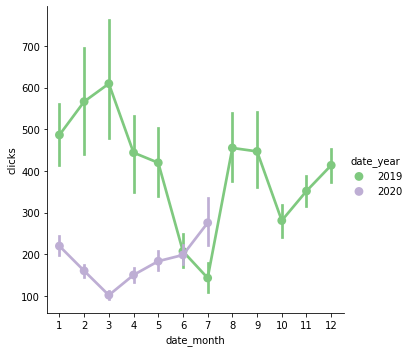

In [16]:
print('Average Number of Clicks per Month (2019 and 2020)')
ax = sns.catplot(x="date_month", y="clicks", hue='date_year', data=data, kind="point", palette='Accent')

**NOTES:**

- The average of number of clicks in 2019 is greater than average of number of clicks in 2020
- In terms of roas, comparing the same months for 2019 and 2020, so far 2020 presents better results than 2019, even when 2019 presents a greater average of number of clicks and revenue
- Based on visualizations above, there is no pattern or seasonality in general terms

### Analysis of Roas, Revenue and Clicks per Year and Quarter

Average Roas per Month (2019 and 2020)


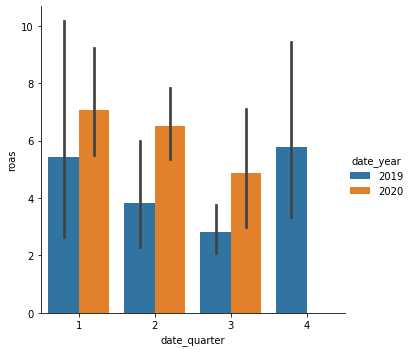

In [17]:
print('Average Roas per Month (2019 and 2020)')
sns.catplot(x="date_quarter", y="roas", kind="bar", data=data, hue='date_year')

Average Clicks per Month (2019 and 2020)


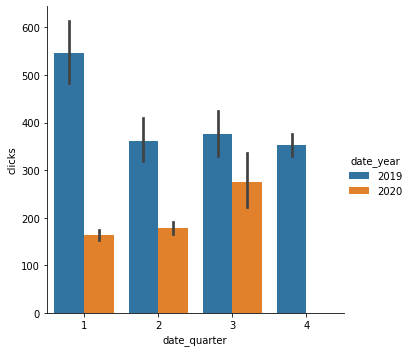

In [18]:
print('Average Clicks per Month (2019 and 2020)')
sns.catplot(x="date_quarter", y="clicks", kind="bar", data=data, hue='date_year')

Average Revenue per Month (2019 and 2020)


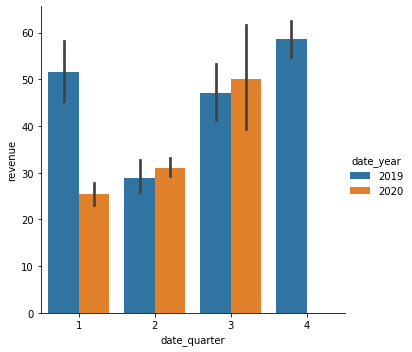

In [19]:
print('Average Revenue per Month (2019 and 2020)')
sns.catplot(x="date_quarter", y="revenue", kind="bar", data=data, hue='date_year')

In [22]:
data[['date_quarter','date_year','revenue']].groupby(['date_year','date_quarter']).sum()

revenue
date_year date_quarter           
2019      1             107780.68
          2              52200.10
          3             162059.09
          4             333212.18
2020      1             131231.16
          2             157907.82
          3              18891.60

Average Roas per Month (2019 and 2020)


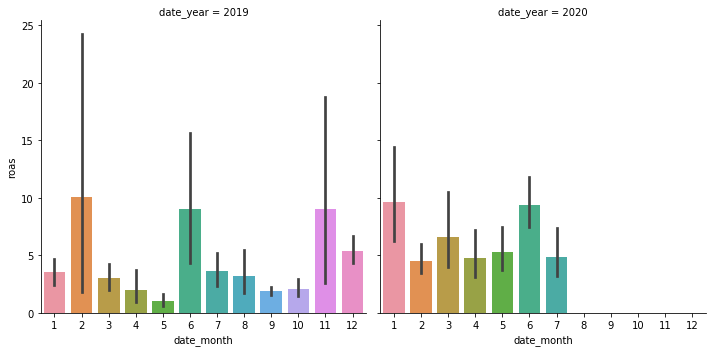

In [20]:
print('Average Roas per Month (2019 and 2020)')
sns.catplot(x="date_month", y="roas", kind="bar", data=data, col='date_year')

Average Roas per Day of the Week (2019 and 2020)


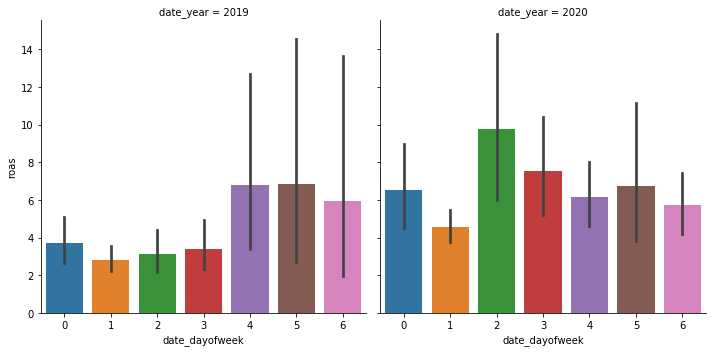

In [21]:
print('Average Roas per Day of the Week (2019 and 2020)')
sns.catplot(x="date_dayofweek", y="roas", kind="bar", data=data,  col='date_year')

In [23]:
def highlight_max(s):
    '''
    highlight max number of variable
    '''
    is_max = s == s.max()
    return ['background-color: yellow' if v else '' for v in is_max]



In [25]:
print('Maximum Average Numbers per Year and Quarter')

max_variables = data[['date_quarter','date_year','clicks',
                      'cost','revenue','cpc','roas']].groupby(['date_year',
                                                               'date_quarter']).mean()

max_variables.style.apply(highlight_max)

Maximum Average Numbers per Year and Quarter


### How many campaigns there are in the dataset?


In [27]:
campaigns_count = data.campaign_id.value_counts()
days = pd.DataFrame({'campaign_id':campaigns_count.index,
                     'days':campaigns_count.values})

print('Number of Campaigns: {}'.format(len(campaigns_count)))


Number of Campaigns: 140


**The new Campaigns Dataset groups data per campaign**

In [31]:
# Building a new dataset with data per campaign

campaigns = data[['campaign_id','cost','clicks','revenue']].groupby(['campaign_id']).sum()

campaigns['cpc'] = data[['campaign_id','cpc']].groupby(['campaign_id']).mean()

campaigns['start_date'] = data[['campaign_id','new_date']].groupby(['campaign_id']).min()

campaigns['end_date'] = data[['campaign_id','new_date']].groupby(['campaign_id']).max()

campaigns['num_days_no_revenue']=data[(data['revenue']==0)][['campaign_id',
                                                             'revenue']].groupby(['campaign_id']).count()

campaigns['num_days_with_revenue']=data[(data['revenue']!=0)][['campaign_id',
                                                               'revenue']].groupby(['campaign_id']).count()

campaigns['num_days_no_revenue']=campaigns['num_days_no_revenue'].fillna(0)
campaigns['num_days_with_revenue']=campaigns['num_days_with_revenue'].fillna(0)
campaigns['roas'] = (campaigns['revenue'] / campaigns['cost'])

campaigns= campaigns.reset_index()
campaigns= pd.merge(campaigns,days)
campaigns['percentage_days_no_revenue'] = round((campaigns['num_days_no_revenue'] * 100) 
                                                / campaigns['days'],2)

In [32]:
campaigns.head()

,campaign_id,cost,clicks,revenue,cpc,start_date,end_date,num_days_no_revenue,num_days_with_revenue,roas,days,percentage_days_no_revenue
0,763598107,34646.01,448641,68105.12,0.064746,2019-01-01,2020-06-05,40.0,373.0,1.965742,413,9.69
1,765789345,45578.55,298529,23214.40,0.092138,2019-01-01,2020-07-06,244.0,294.0,0.509327,538,45.35
2,783569741,4970.67,15542,5154.46,0.235481,2019-01-01,2019-10-01,177.0,93.0,1.036975,270,65.56
3,790052241,15.54,785,166.34,0.017066,2019-01-03,2020-07-06,310.0,7.0,10.703990,317,97.79
4,800965756,4025.64,44285,2971.30,0.074723,2019-01-01,2020-07-06,413.0,93.0,0.738094,506,81.62


## Campaigns Dataset Description

### Dataset Info
- Campaign_id : Campaign idntificator
- Cost: Campaign Cost
- Clicks: Number of clicks at specific date
- Revenue: Income
- Cpc (Cost per click): It measures of how much each ad campaign is paying per click
- Roas (Return on ad spend): It measures how efficient the campaign is performing and the target ROAS for this client is 1.50. (Revenue/Cost)      
- Start date: Campaign start date 
- End date:  Campaign end date 
- Num_days_no_revenue: Number of days with revenue > 0
- Num_days_with_revenue: Number of days with 0 revenue
- Days: Number of days of campaign
- Percentage_days_no_revenue: Percentage of days with revenu = 0


|           DATA             |               |
|----------------------------|---------------|
| Number of Instances        | 140         |
| Number of Attributes:      | 12             |
| Attribute Characteristics: | Object, integer and float|





### Exploring Data of Campaigns

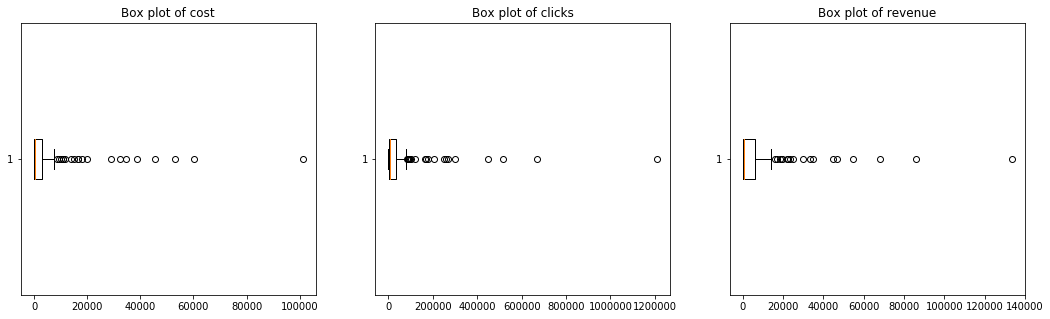

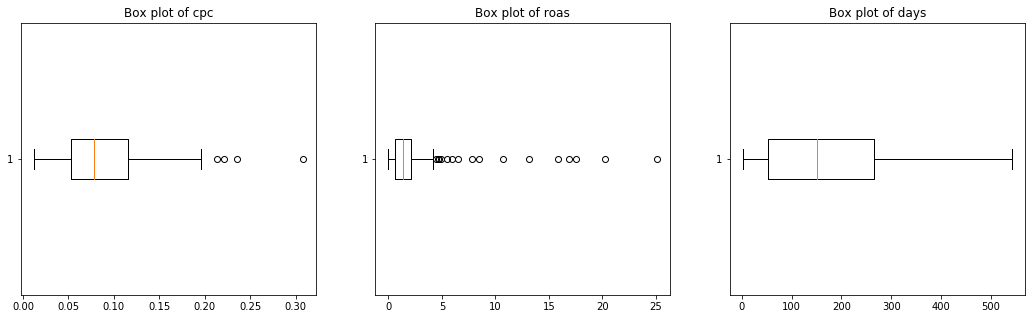

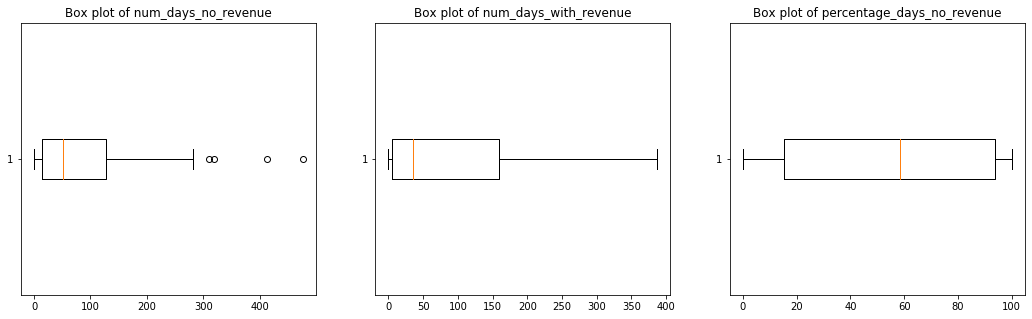

In [33]:
# Visualizing descriptive statistics

cols = ['cost', 'clicks', 'revenue', 'cpc', 'roas','days',
        'num_days_no_revenue', 'num_days_with_revenue','percentage_days_no_revenue']

i=0

while i < len(cols):

    plt.figure(figsize=(18,5))
    plt.subplot(1,3,1)
    plt.boxplot(campaigns[cols[i]], vert=False)
    title = 'Box plot of ' + str(cols[i])
    plt.title(title)
    
    
    if i+1 < len(cols):
        plt.subplot(1,3,2)
        plt.boxplot(campaigns[cols[i+1]], vert=False)
        title = 'Box plot of ' +  str(cols[i+1])
        plt.title(title)

    if i+2 < len(cols):
        plt.subplot(1,3,3)
        plt.boxplot(campaigns[cols[i+2]], vert=False)
        title = 'Box plot of ' +  str(cols[i+2])
        plt.title(title)

    i+=3
    
plt.show()

In [34]:
# Generate descriptive statistics

campaigns[['cost', 'clicks', 'revenue', 'cpc', 'roas','days','num_days_no_revenue',
           'num_days_with_revenue','percentage_days_no_revenue']].describe()

,cost,clicks,revenue,cpc,roas,days,num_days_no_revenue,num_days_with_revenue,percentage_days_no_revenue
count,140.000000,1.400000e+02,140.000000,140.000000,140.000000,140.000000,140.000000,140.000000,140.000000
mean,4937.691000,4.962382e+04,6880.590214,0.087439,2.329622,168.764286,81.364286,87.400000,54.685714
std,12781.707645,1.367444e+05,16791.455868,0.049693,3.841881,137.393653,88.741254,103.711193,36.759079
min,0.240000,2.000000e+00,0.000000,0.012075,0.000000,2.000000,0.000000,0.000000,0.000000
25%,46.420000,6.647500e+02,74.420000,0.052966,0.615874,51.750000,13.500000,5.000000,15.442500
50%,464.370000,7.397500e+03,730.480000,0.078309,1.341573,150.000000,51.500000,35.000000,58.300000
75%,3120.825000,3.343400e+04,5854.062500,0.115039,2.092493,265.500000,128.250000,159.500000,93.792500
max,101093.040000,1.210612e+06,133434.710000,0.307477,25.107194,542.000000,476.000000,387.000000,100.000000


### Analyzing low and high performance based on roas

In [35]:
low_performance = campaigns[(campaigns['roas']<1.5)][['campaign_id','roas','clicks',
                                                      'days','revenue','cost','cpc',
                                                      'percentage_days_no_revenue',
                                                     'start_date']]

print('Descriptive statistics of low performance campaigns')
low_performance.describe()


,campaign_id,roas,clicks,days,revenue,cost,cpc,percentage_days_no_revenue
count,8.100000e+01,81.000000,8.100000e+01,81.000000,81.000000,81.000000,81.000000,81.000000
mean,2.193322e+09,0.681508,5.946857e+04,161.123457,6723.105309,6169.919136,0.093967,62.271481
std,1.370844e+09,0.508870,1.680517e+05,130.283382,19036.624424,15707.687434,0.054108,37.647555
min,7.657893e+08,0.000000,2.000000e+00,2.000000,0.000000,0.240000,0.012075,0.000000
25%,8.326847e+08,0.180569,6.300000e+02,53.000000,3.680000,39.040000,0.056897,20.980000
50%,1.038466e+09,0.679748,4.866000e+03,147.000000,380.450000,453.780000,0.090571,73.330000
75%,3.408119e+09,1.182233,3.293400e+04,254.000000,3275.430000,3427.760000,0.120649,98.110000
max,4.946118e+09,1.485117,1.210612e+06,538.000000,133434.710000,101093.040000,0.307477,100.000000


In [41]:
high_performance = campaigns[(campaigns['roas']>=1.5)][['campaign_id','roas','clicks',
                                                       'days','revenue','cost','cpc',
                                                       'percentage_days_no_revenue',
                                                       'start_date']]

print('Descriptive statistics of high performance campaigns')
high_performance.describe()

Descriptive statistics of high performance campaigns


,campaign_id,roas,clicks,days,revenue,cost,cpc,percentage_days_no_revenue
count,5.900000e+01,59.000000,59.000000,59.000000,59.000000,59.000000,59.000000,59.000000
mean,2.435119e+09,4.592286,36108.152542,179.254237,7096.798305,3245.987966,0.078477,44.271356
std,1.651051e+09,5.100461,74420.431244,147.085665,13258.213554,6795.485904,0.041698,33.055274
min,7.635981e+08,1.517368,21.000000,7.000000,5.750000,0.740000,0.016522,0.000000
25%,8.326847e+08,1.771257,771.500000,42.000000,228.005000,70.580000,0.051014,11.925000
50%,1.041358e+09,2.384076,7613.000000,153.000000,1400.330000,577.760000,0.068966,37.930000
75%,3.505692e+09,4.563900,32118.500000,277.000000,6792.225000,2240.315000,0.092283,72.940000
max,5.153692e+09,25.107194,448641.000000,542.000000,68105.120000,34646.010000,0.220640,98.440000


### List of campaigns with more than 80% of the campaign days with zero revenue

In [40]:
low_performance[(low_performance['percentage_days_no_revenue']> 80) 
                & (low_performance['days']>30)][['campaign_id','roas','revenue','days',
                                                 'percentage_days_no_revenue']].sort_values("percentage_days_no_revenue", ascending=False)

,campaign_id,roas,revenue,days,percentage_days_no_revenue
119,3603264437,0.000000,0.00,55,100.00
34,832684658,0.000000,0.00,58,100.00
36,832684663,0.000000,0.00,54,100.00
40,869433838,0.000000,0.00,61,100.00
41,869433839,0.000000,0.00,51,100.00
42,869433901,0.000000,0.00,61,100.00
43,869433902,0.000000,0.00,51,100.00
44,869433904,0.000000,0.00,59,100.00
45,869433905,0.000000,0.00,50,100.00
74,3224020632,0.394723,15.41,199,98.99


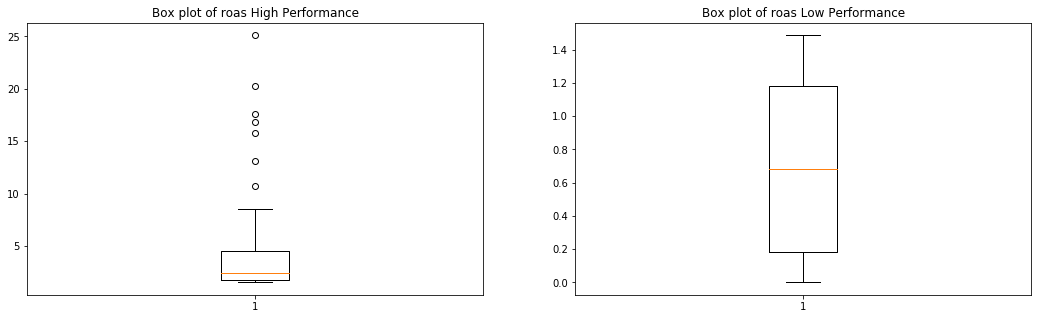

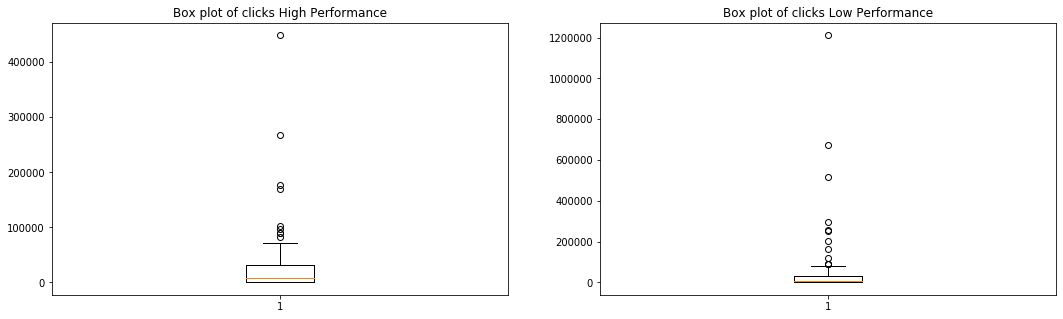

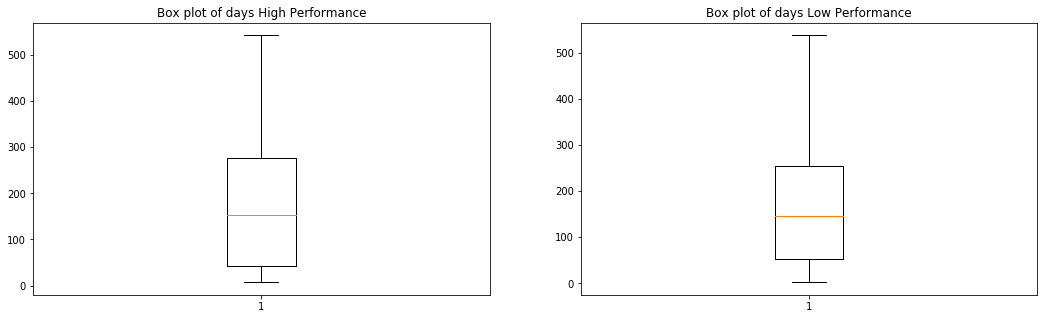

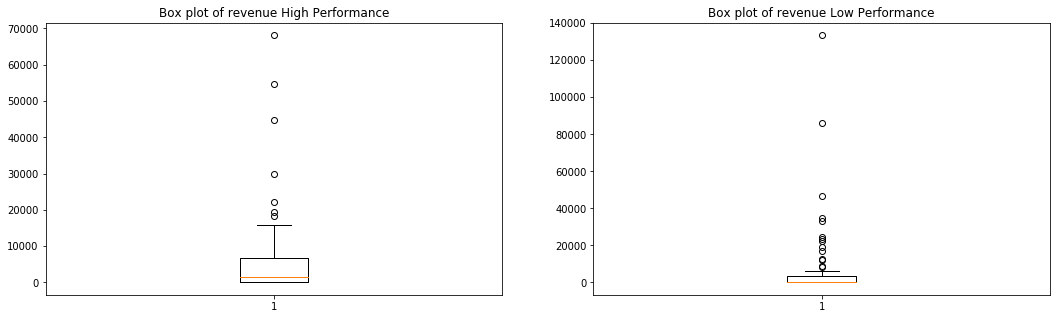

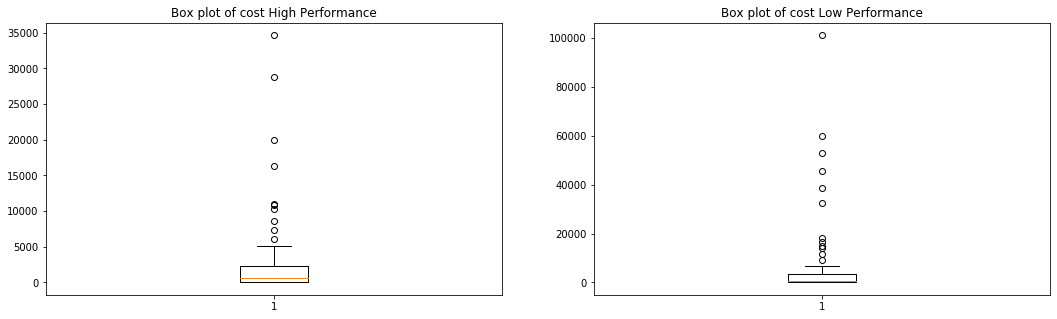

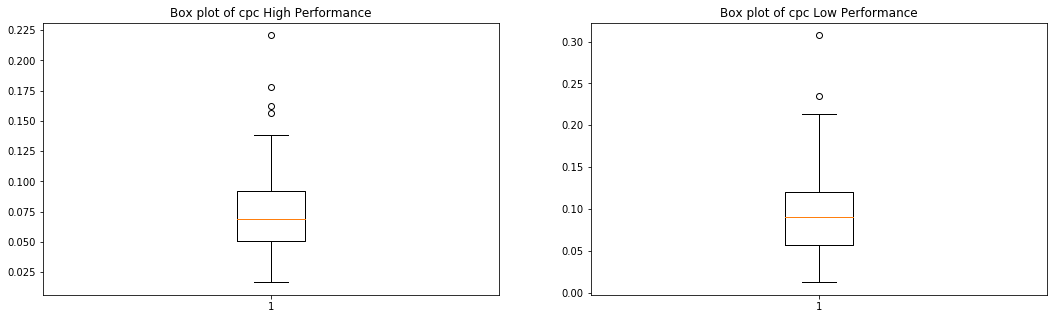

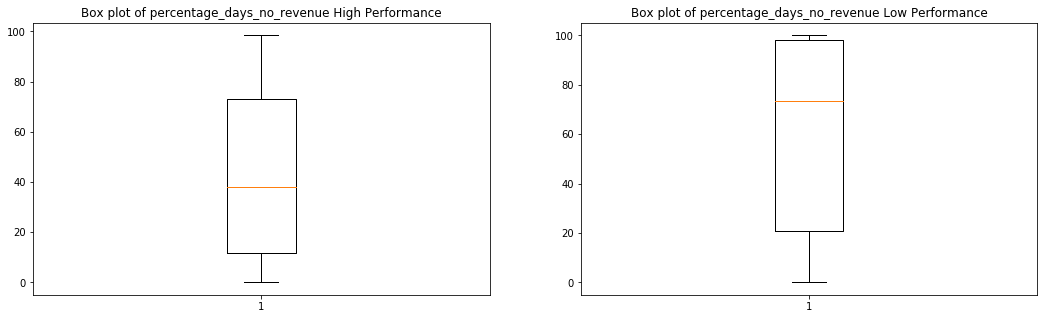

In [257]:
cols = ['roas','clicks','days','revenue','cost','cpc','percentage_days_no_revenue']

i=0
while i < len(cols):

    plt.figure(figsize=(18,5))
    plt.subplot(1,2,1)
    plt.boxplot(high_performance[cols[i]])
    title = 'Box plot of ' + str(cols[i]) + ' High Performance'
    plt.title(title)
    
    plt.subplot(1,2,2)
    plt.boxplot(low_performance[cols[i]])
    title = 'Box plot of ' + str(cols[i]) + ' Low Performance'
    plt.title(title)
    
    i+=1

plt.show()

**NOTES:**

    - Based on numbers and visualizations above, we know that 81 of 140 campaigns are below the target ROAS (1.5). It means 58% are low performance (below of target ROAS) and 42% of the campaigns have a metric ROAS equal or greater than 1.5
    - High-performance campaigns (HPD) last at least 7 days, while low-performance campaigns (LPC) last minimum two days
    - LPC costs, revenue, and cpc are higher than HPC cost, revenue, and cpc
    - Correlation among variables are similar between the original data and campaigns dataset


Relationships Among Variables


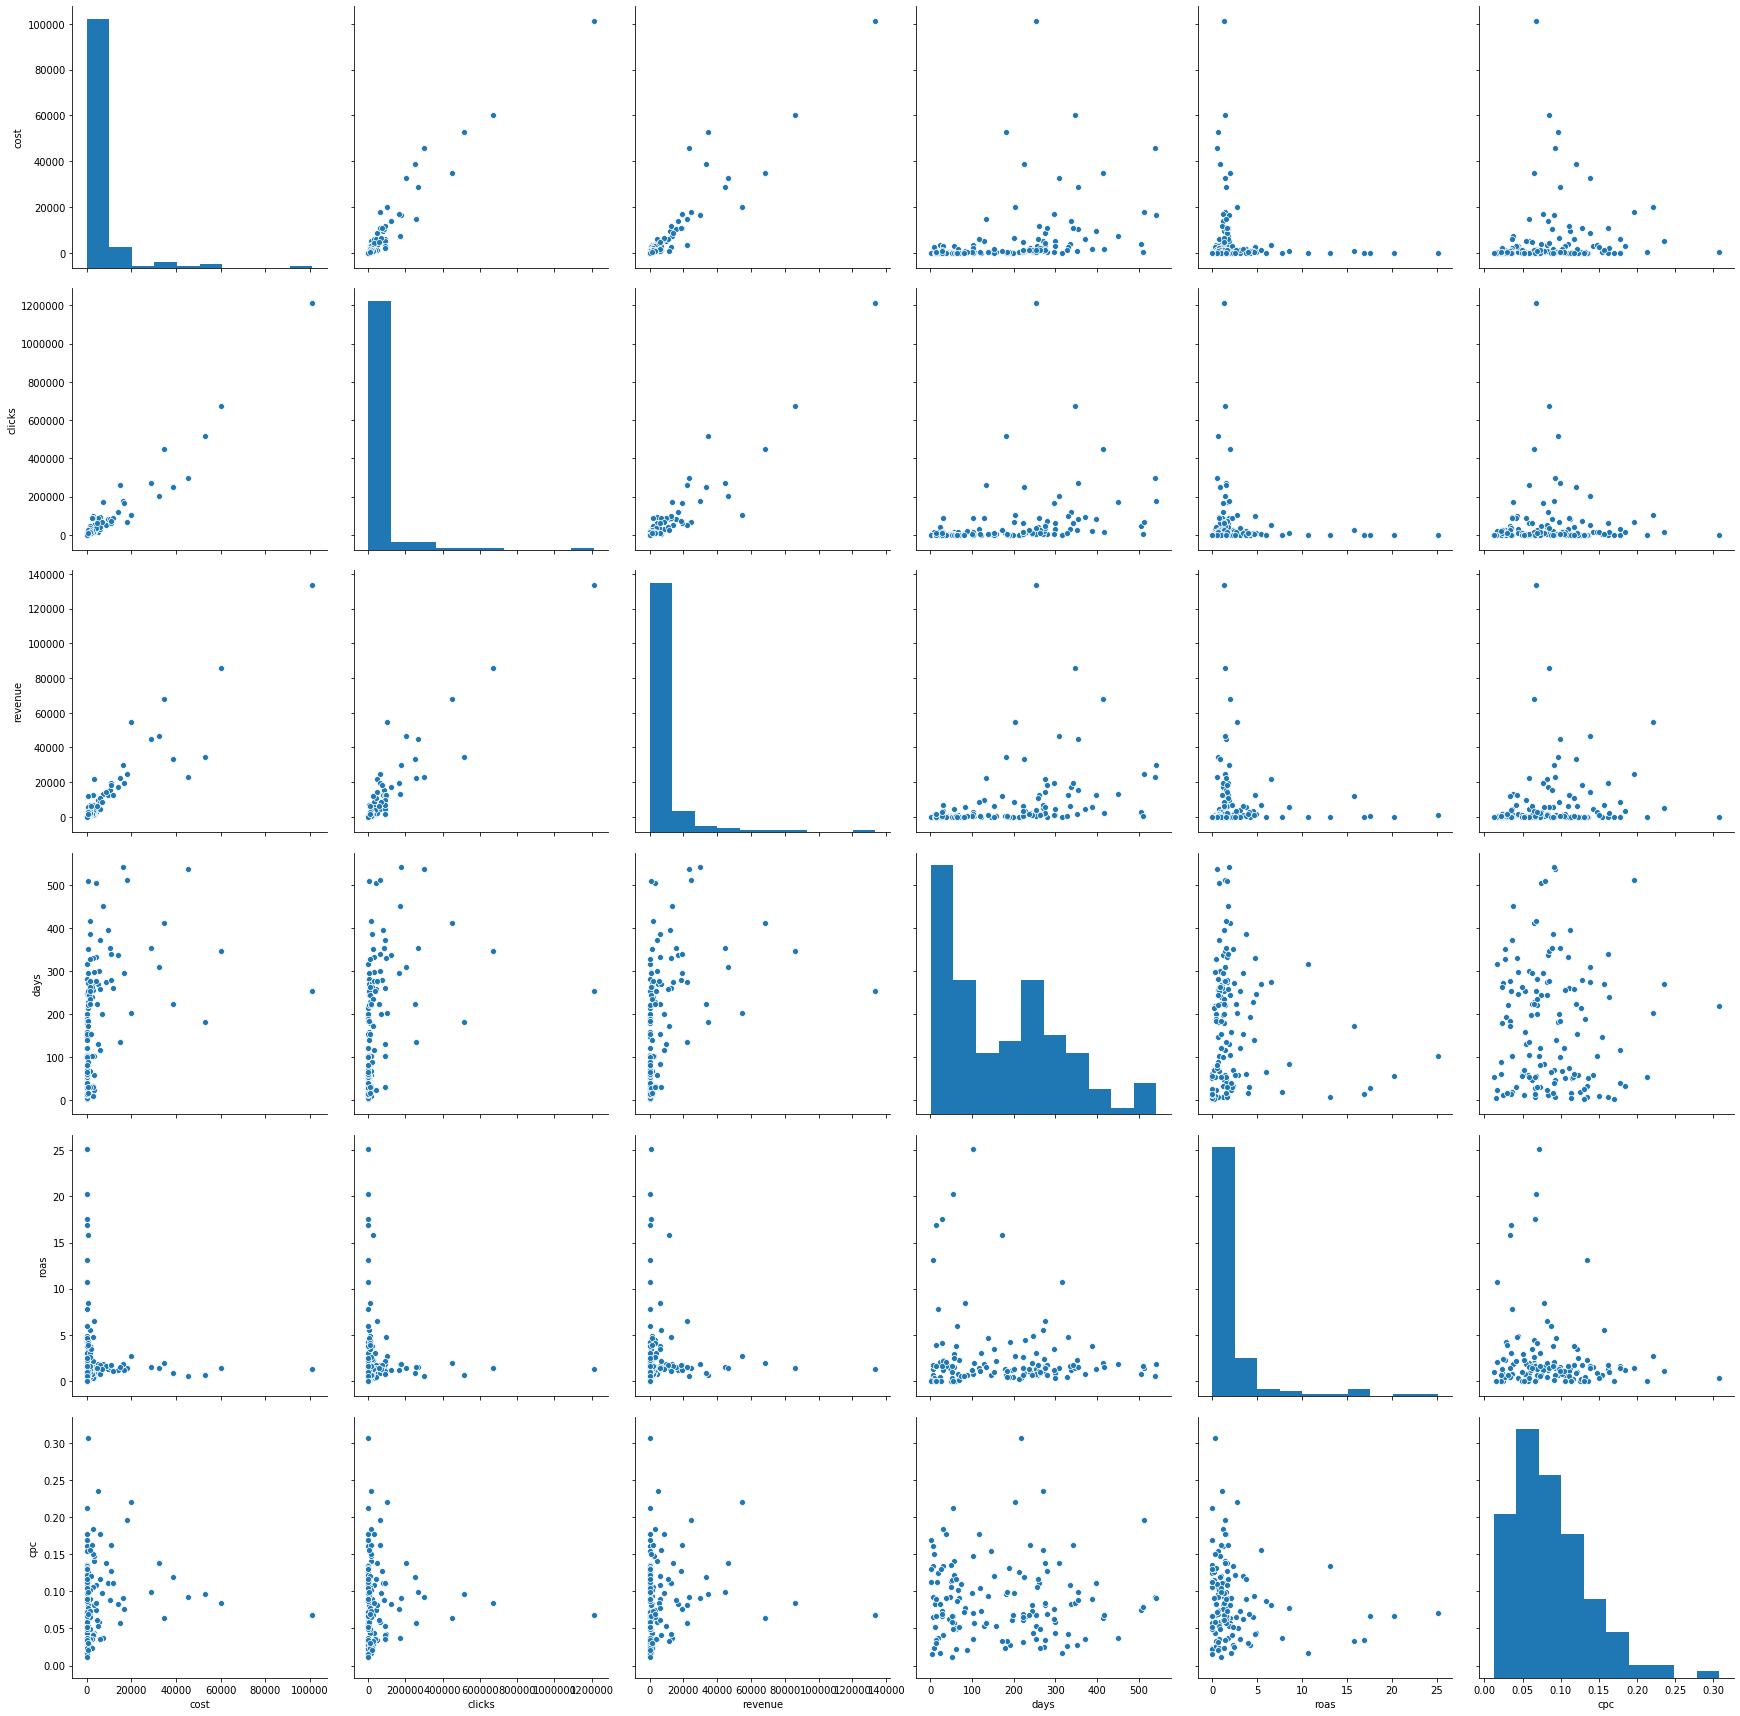

In [258]:
print('Relationships Among Variables') 
g = sns.pairplot(campaigns, 
                  x_vars=['cost','clicks','revenue','days','roas','cpc'],
                  y_vars=['cost','clicks','revenue','days','roas','cpc'],
                  height=4, palette='Accent')

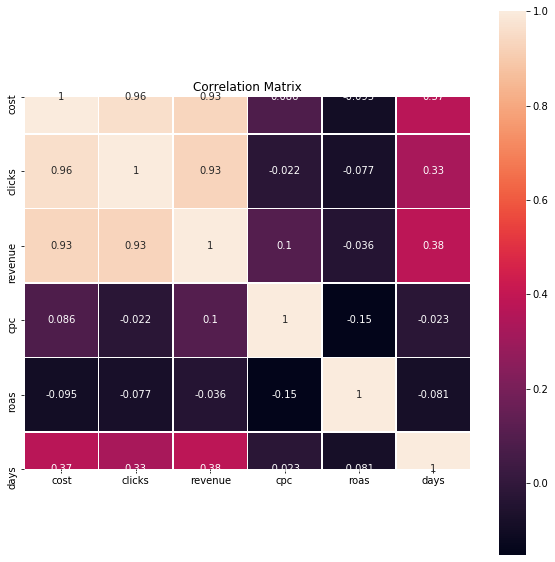

In [259]:
correlation = campaigns[['cost','clicks','revenue','cpc','roas','days']].corr()

plt.figure(figsize=(10,10))
sns.heatmap(correlation, square=True, annot=True, linewidths=.5)
plt.title("Correlation Matrix")

plt.show()

**NOTES:**

The relationship among variables is similar to the results of the original dataset, and the conclusions are the same: 

- Based on the visualization above I can say that cost, revenue, and clicks are the variables with a stronger relationship between them. 
- Based on the Correlation Matrix below, I confirm the relation between those variables. More clicks, more cost, more revenue but it does not mean an increase in roas variable.


_________

By: Wendy Navarrete

July 2020